In [9]:
# Necessary imports 
import numpy as np 
import pandas as pd 
import xgboost as xg 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE 

In [10]:
# Necessary imports 
import numpy as np 
import pandas as pd 
import xgboost as xg 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE 

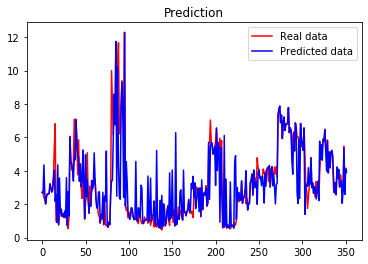

In [12]:
# Load the data 
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
# Importing the dataset
dataset = pd.read_csv('K:/données M2/XGBOOST/terrain.csv',sep=',')

X = dataset.iloc[:, 2:5].values
y = dataset.iloc[:,5].values
# Splitting 
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
#train_X, test_X, train_y, test_y = train_test_split(X, y,test_size = 0.3, random_state = 123) 
  


# fit model no training data
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X)

plt.plot(y, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()
# RMSE Computation 
#rmse = np.sqrt(MSE(test_y, pred)) 
#print("RMSE : % f" %(rmse)) 

In [13]:
y = y.reshape(y.shape[0])
y_pred = y_pred.reshape(y_pred.shape[0])

df = pd.DataFrame({'Real Values':y, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,2.71,2.710252
1,2.66,2.658988
2,2.42,4.354344
3,2.26,2.658988
4,2.02,2.015021
...,...,...
347,2.73,2.751763
348,5.48,5.403221
349,3.06,2.586439
350,4.16,4.097176


In [14]:
import numpy as np
import scipy.stats
scipy.stats.pearsonr(y, y_pred) [0]

0.7903860338353264

In [15]:
import numpy as np
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error (MAE): 0.6394466787373477
Mean Squared Error (MSE): 1.9530872419622491
Root Mean Squared Error (RMSE): 1.3975289771458226


In [16]:
model.save_model('modele xgboost-19.01.2021')

In [17]:
import joblib
#save model
joblib.dump(model, 'modele xgboost-19.01.2021') 

['modele xgboost-19.01.2021']

In [18]:
#load saved model
#xgb = joblib.load(filename)

In [20]:
df.to_excel(r'K:/données M2/XGBOOST/resultatxgboost.xlsx', index = False)